In [2]:
import numpy as np
import pandas as pd
import os
from scipy.stats import entropy
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [3]:
train_data_df = pd.read_csv("D:\\Data_Science\\Datasets\\Hotel-Challenge\\train.csv")
train_data_df.head()

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22


In [4]:
print("Number of images in the dataset:",train_data_df.shape[0])

Number of images in the dataset: 97556


In [5]:
# Checking for duplicates
duplicate_images = train_data_df[train_data_df.duplicated(subset=['image'])==True]['image'].values
for dup in duplicate_images:
    print(train_data_df[train_data_df['image']==dup])

                      image  chain  hotel_id            timestamp
56845  c7c7383898d76598.jpg      6     60918  2020-07-18 00:03:38
56846  c7c7383898d76598.jpg      6     60918  2020-08-29 04:35:13
                      image  chain  hotel_id            timestamp
62238  ce27d36c9147cc19.jpg      6     60918  2020-07-18 00:03:38
62239  ce27d36c9147cc19.jpg      6     60918  2020-08-29 04:35:13


Two duplicates found. Most probably by the same user. As chain, hotel_id and timestamp are identical.

In [6]:
# Check if nan values present
print("Number of NaN values present:",train_data_df.isna().sum())

Number of NaN values present: image        0
chain        0
hotel_id     0
timestamp    0
dtype: int64


In [7]:
# Chain value 0 represents individual hotels
print("Number of Unique Hotel Chains:",train_data_df['chain'].nunique()-1)

Number of Unique Hotel Chains: 87


Text(0.5, 1.0, 'Hotel Chains and their hotel counts')

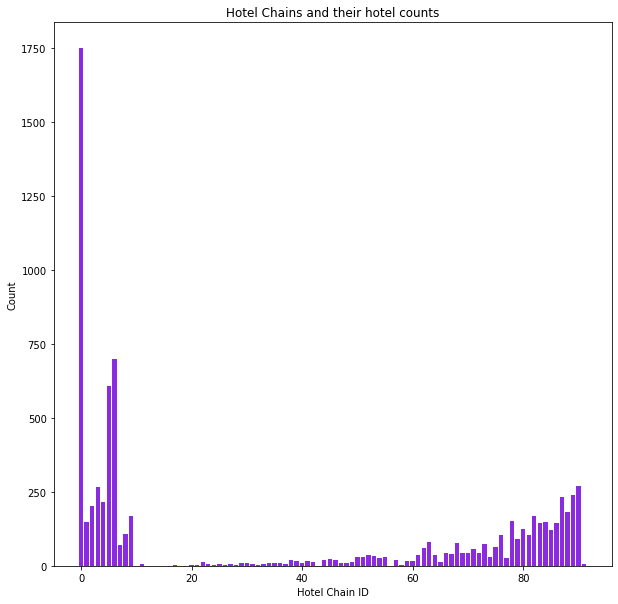

In [8]:
# Hotel Chains and how many hotel each hotel chain contain
hotel_count = {}
for hotel_chain_id in train_data_df['chain'].unique():
    key = hotel_chain_id
    value = train_data_df[train_data_df['chain']==hotel_chain_id]['hotel_id'].nunique()
    hotel_count[key] = value

#hotel_count.pop(0)
bar = plt.bar(x=hotel_count.keys(),height=hotel_count.values(),color="blueviolet")
plt.xlabel("Hotel Chain ID")
plt.ylabel("Count")
plt.title("Hotel Chains and their hotel counts")

Lots of individual hotels in the data.

In [10]:
# Number of hotels and how many images for each hotel
hotels = train_data_df['hotel_id'].unique()
hotels_image_count = []
for hotel in hotels:
    cnt = train_data_df[train_data_df['hotel_id']==hotel]['image'].nunique()
    hotels_image_count.append(cnt)

hotel_image_df = pd.DataFrame({"hotel_id":map(str,hotels),"image_count":hotels_image_count})
hotel_image_df.sort_values(by="image_count",ascending=False,inplace=True)

Text(0.5, 1.0, 'Hotel and their image count (Top 50)')

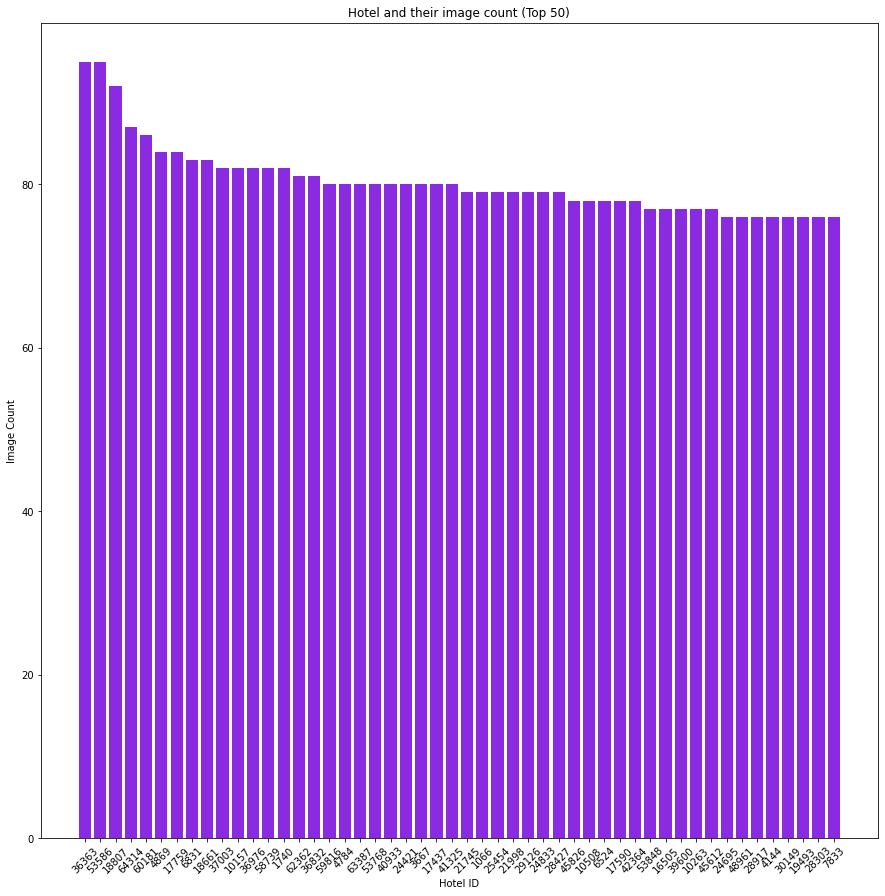

In [11]:
plt.figure(figsize=[15,15])
top_50_hotel_image_df = hotel_image_df.iloc[:50,:]
plt.bar(x=top_50_hotel_image_df["hotel_id"],height=top_50_hotel_image_df["image_count"],color="blueviolet")
plt.xlabel("Hotel ID")
plt.xticks(rotation=45)
plt.ylabel("Image Count")
plt.title("Hotel and their image count (Top 50)")

Text(0.5, 1.0, 'Hotel and their image count (Bottom 50)')

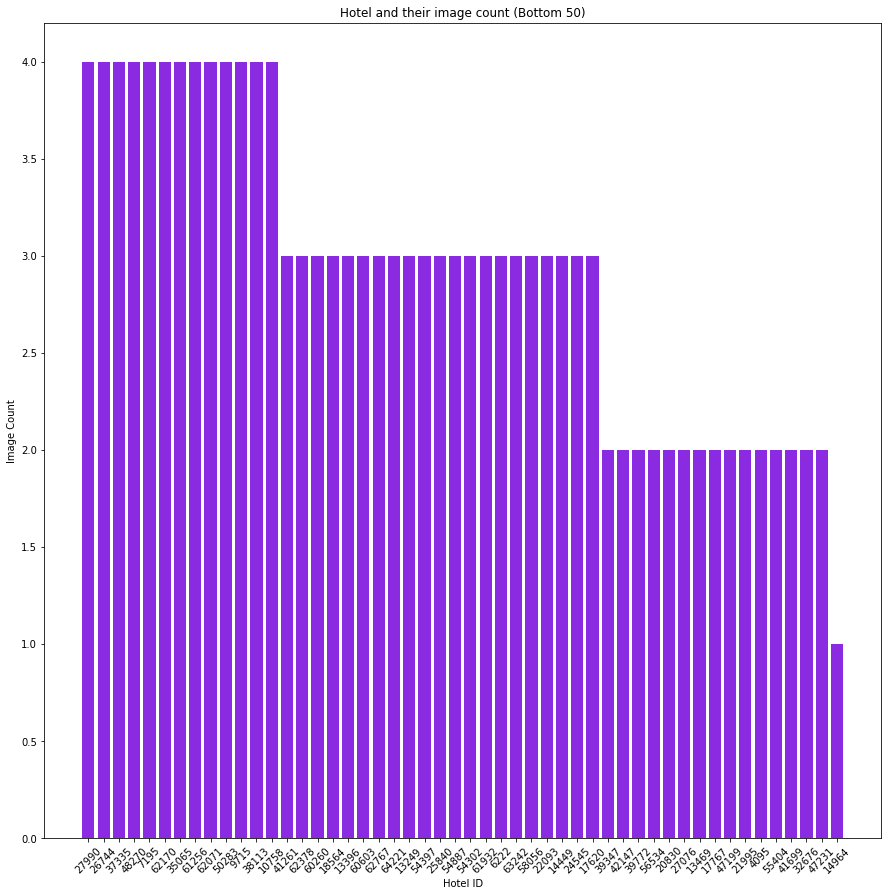

In [12]:
plt.figure(figsize=[15,15])
bottom_50_hotel_image_df = hotel_image_df.iloc[-50:,:]
plt.bar(x=bottom_50_hotel_image_df["hotel_id"],height=bottom_50_hotel_image_df["image_count"],color="blueviolet")
plt.xlabel("Hotel ID")
plt.xticks(rotation=45)
plt.ylabel("Image Count")
plt.title("Hotel and their image count (Bottom 50)")

Huge imbalance between top 50 and bottom 50. A quanitification will show a better picture

In [13]:
def shannon_entropy(no_of_classes,sizes,dataset_size):
    sh_en = 0
    for i in range(no_of_classes):
        sh_en += (sizes[i]/dataset_size)*np.log(sizes[i]/dataset_size)
    return -sh_en

def quant_imbalance(no_of_classes,sizes,dataset_size):
    sh_en = shannon_entropy(no_of_classes,sizes,dataset_size)
    return sh_en/no_of_classes

In [14]:
# Imbalance quantification using Shannon Entropy
print(quant_imbalance(hotel_image_df.shape[0],hotel_image_df['image_count'].values.tolist(),hotel_image_df.shape[0]))

0.009943978196167188


This number quantifies how badly the data is distributed. Proper measures will have to be taken while training to avoid overfitting to a few classes.